# Crypto Trend Analysis Using Regression

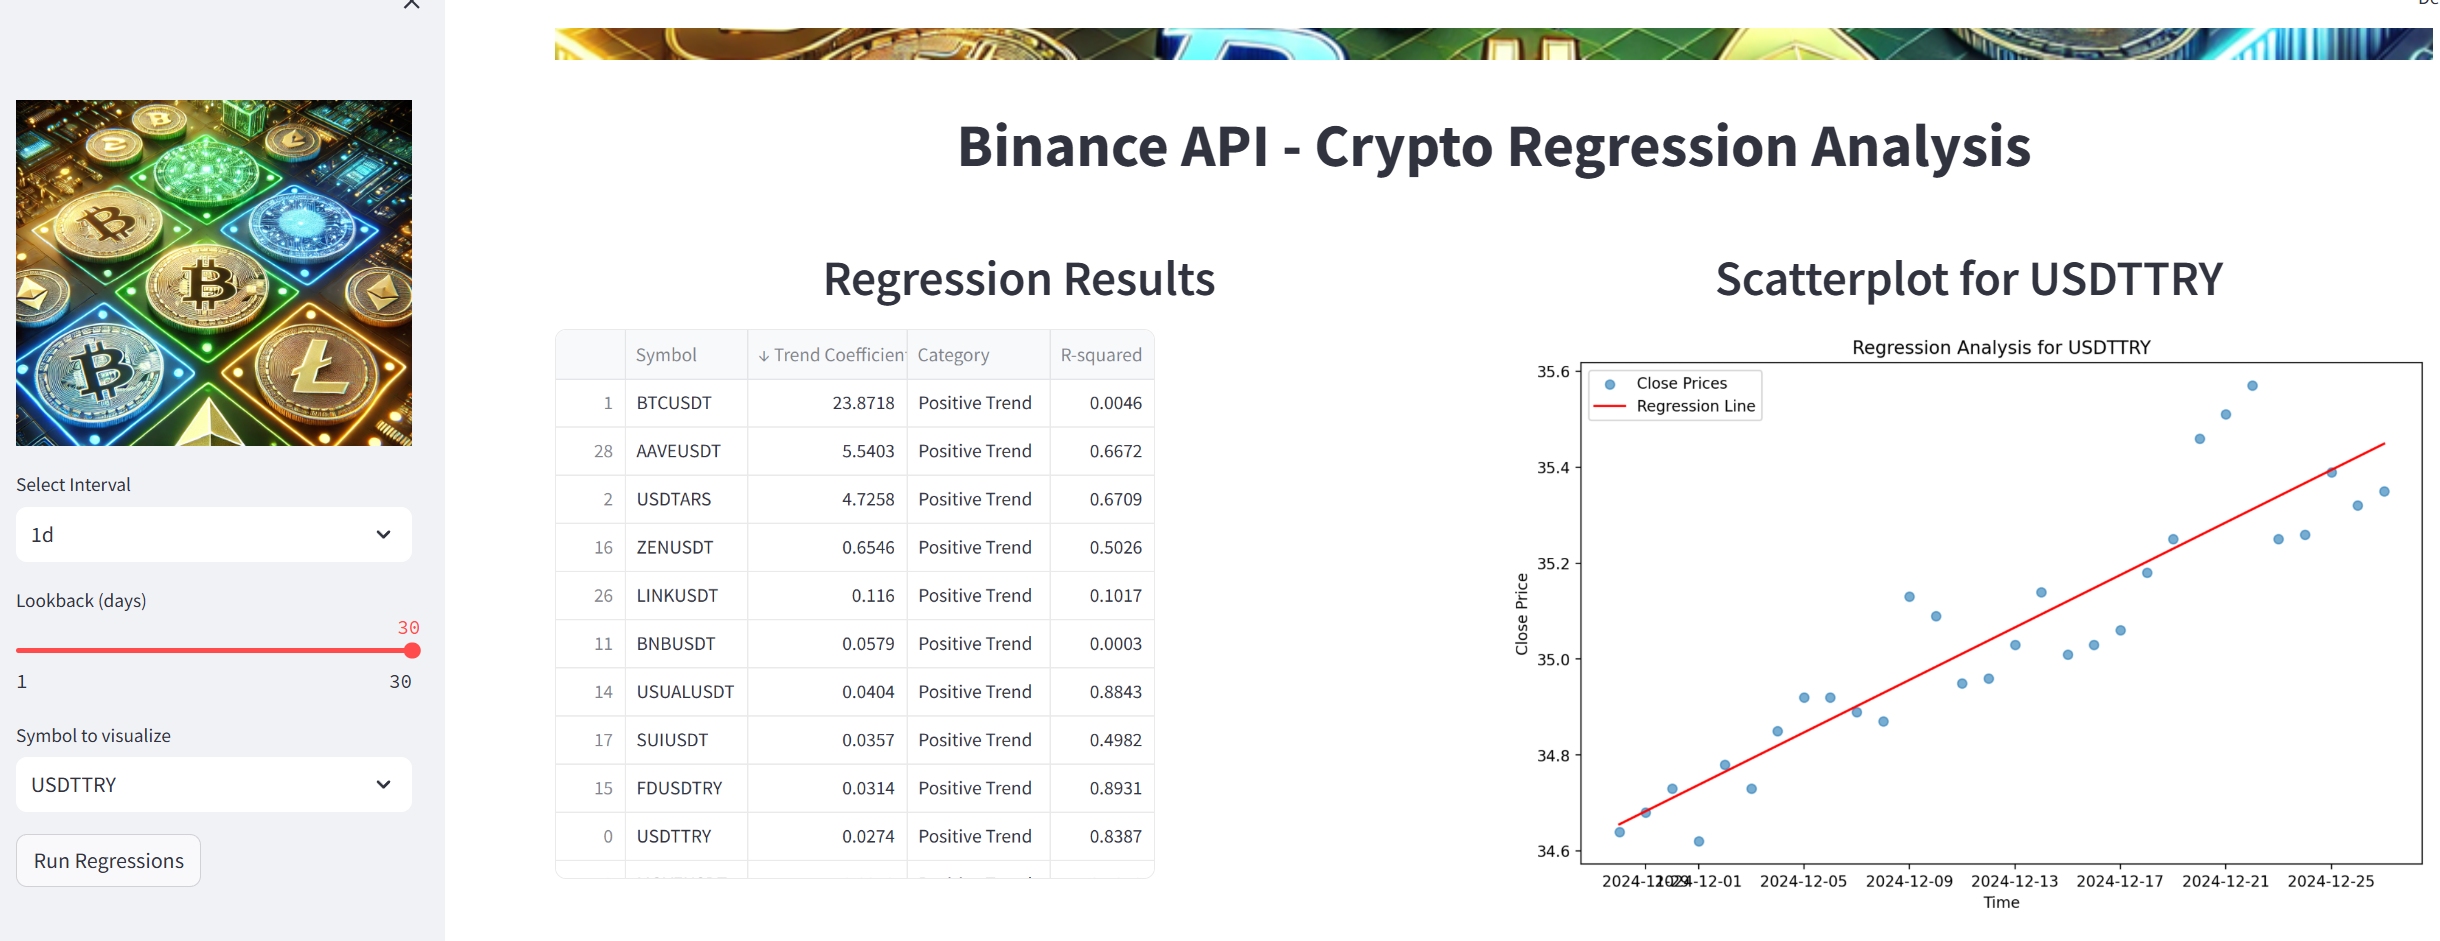

In [2]:
import os
from IPython.display import Image
Image("Pic3.png",width=900, height=700)

## Agenda:
- Connect to Binance
- Function to pull data
- Function for Regression and categorize trends
- ScatterPlot
- Streamlit App

## Step 1 - Connect to Binance

In [ ]:
# pip install python-binance

In [1]:
import streamlit as st
import pandas as pd
import numpy as np
import requests
import statsmodels.api as sm
import matplotlib.pyplot as plt
from datetime import datetime, timedelta, timezone
from binance.client import Client
from PIL import Image

# Initialize Binance Client
API_KEY = ''
API_SECRET = ''

# Initialize Binance client
client = Client(API_KEY, API_SECRET)

## Step 2 - Function to pull data

In [7]:
# Function to pull data from Binance API
def get_binance_data(symbol, interval, lookback):
    end_time = datetime.now(timezone.utc)
    start_time = end_time - timedelta(days=lookback)
    klines = client.get_historical_klines(symbol, interval, start_time.strftime("%d %b %Y %H:%M:%S"),
                                          end_time.strftime("%d %b %Y %H:%M:%S"))
    df = pd.DataFrame(klines, columns=['Open time', 'Open', 'High', 'Low', 'Close', 'Volume',
                                       'Close time', 'Quote asset volume', 'Number of trades',
                                       'Taker buy base asset volume', 'Taker buy quote asset volume', 'Ignore'])
    df['Open time'] = pd.to_datetime(df['Open time'], unit='ms')
    df['Close'] = df['Close'].astype(float)
    return df[['Open time', 'Close']]


In [11]:
# Example
crypto_pairs = ['USDTTRY', 'BTCUSDT', 'USDTARS', 'USDTCOP', 'ETHUSDT', 'USDCUSDT']
pair = 'USDTTRY'
interval = '15m'  # Time interval (e.g., '1h', '1d')
lookback = 3  # Lookback period

df = get_binance_data(pair, interval, lookback)
df

,Open time,Close
0,2024-12-25 13:45:00,35.35
1,2024-12-25 14:00:00,35.37
2,2024-12-25 14:15:00,35.37
3,2024-12-25 14:30:00,35.38
4,2024-12-25 14:45:00,35.39
...,...,...
283,2024-12-28 12:30:00,35.31
284,2024-12-28 12:45:00,35.30
285,2024-12-28 13:00:00,35.31
286,2024-12-28 13:15:00,35.31


## Step 3 - Function for Regression and categorize trends

In [13]:
# Function to run regression and categorize trends
def categorize_trends(crypto_pairs, interval, lookback):
    results = []

    for pair in crypto_pairs:
        try:
            df = get_binance_data(pair, interval, lookback)
            df['time_index'] = range(len(df))
            X = sm.add_constant(df['time_index'])
            y = df['Close']
            model = sm.OLS(y, X).fit()
            trend = model.params['time_index']

            if trend > 0.001:
                category = 'Positive Trend'
            elif trend < -0.001:
                category = 'Negative Trend'
            else:
                category = 'Flat'

            results.append({
                'Symbol': pair,
                'Trend Coefficient': trend,
                'Category': category,
                'R-squared': model.rsquared
            })
        except Exception as e:
            results.append({
                'Symbol': pair,
                'Trend Coefficient': None,
                'Category': 'Error',
                'R-squared': None
            })

    return pd.DataFrame(results)

In [15]:
df_results = categorize_trends(crypto_pairs, interval, lookback)
df_results

,Symbol,Trend Coefficient,Category,R-squared
0,USDTTRY,-0.000484,Flat,0.427169
1,BTCUSDT,-16.753754,Negative Trend,0.743306
2,USDTARS,0.056608,Positive Trend,0.519612
3,USDTCOP,0.185011,Positive Trend,0.755059
4,ETHUSDT,-0.476312,Negative Trend,0.537804
5,USDCUSDT,0.000003,Flat,0.808598


## Step 4 - ScatterPlot

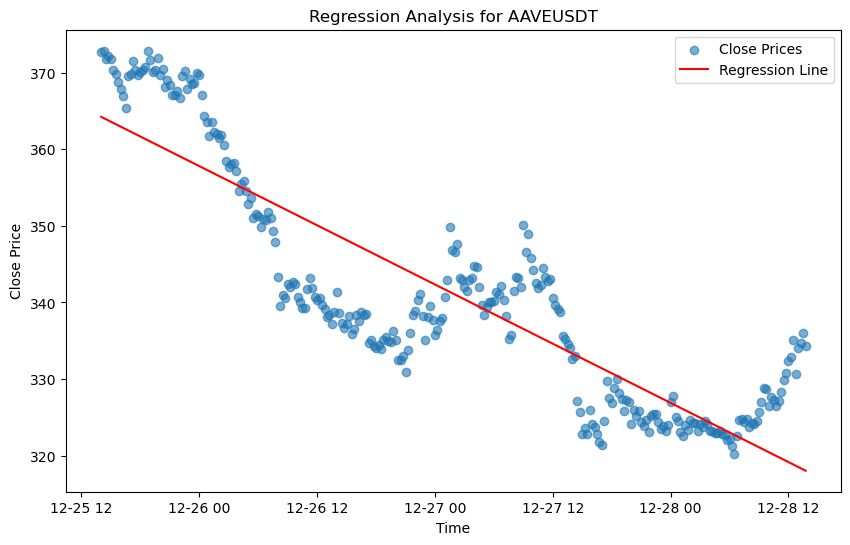

In [33]:
%matplotlib inline

symbol_to_visualize = 'AAVEUSDT'

data = get_binance_data(symbol_to_visualize, interval, lookback)
X = sm.add_constant(range(len(data)))
y = data['Close']
model = sm.OLS(y, X).fit()
data['Regression'] = model.predict(X)

plt.figure(figsize=(10, 6))
plt.scatter(data['Open time'], data['Close'], label='Close Prices', alpha=0.6)
plt.plot(data['Open time'], data['Regression'], color='red', label='Regression Line')
plt.xlabel("Time")
plt.ylabel("Close Price")
plt.title(f"Regression Analysis for {symbol_to_visualize}")
plt.legend()
plt.show()

## Step 5 - Streamlit

In [35]:
import streamlit as st
import pandas as pd
import numpy as np
import requests
import statsmodels.api as sm
import matplotlib.pyplot as plt
from datetime import datetime, timedelta, timezone
from binance.client import Client
from PIL import Image

# Initialize Binance Client
API_KEY = ''
API_SECRET = ''

# Initialize Binance client
client = Client(API_KEY, API_SECRET)

# List of pairs
crypto_pairs = ['USDTTRY', 'BTCUSDT', 'USDTARS', 'USDTCOP', 'ETHUSDT', 'USDCUSDT',
                 'FDUSDUSDT', 'XRPUSDT', 'SOLUSDT', 'DOGEUSDT', 'PENGUUSDT',
                 'BNBUSDT', 'MOVEUSDT', 'PEPEUSDT', 'USUALUSDT', 'FDUSDTRY',
                 'ZENUSDT', 'SUIUSDT', 'USDTBRL', 'HBARUSDT', 'TRXUSDT', 'VANAUSDT',
                 'PHAUSDT', 'ENAUSDT', 'ADAUSDT', 'MEUSDT', 'LINKUSDT', 'VIBUSDT',
                 'AAVEUSDT', 'AVAXUSDT', 'PNUTUSDT', 'STGUSDT', 'CRVUSDT',
                 'FTTUSDT', 'SHIBUSDT', 'LTCUSDT', 'AGLDUSDT', 'FTMUSDT',
                 'FLOKIUSDT', 'COWUSDT', 'GMTUSDT', 'WLDUSDT', 'WIFUSDT', 'LPTUSDT',
                 'BONKUSDT', 'UNIUSDT', 'EIGENUSDT', 'NEIROUSDT', 'NEARUSDT',
                 'DOTUSDT']

# Function to pull data from Binance API
def get_binance_data(symbol, interval, lookback):
    end_time = datetime.now(timezone.utc)
    start_time = end_time - timedelta(days=lookback)
    klines = client.get_historical_klines(symbol, interval, start_time.strftime("%d %b %Y %H:%M:%S"),
                                          end_time.strftime("%d %b %Y %H:%M:%S"))
    df = pd.DataFrame(klines, columns=['Open time', 'Open', 'High', 'Low', 'Close', 'Volume',
                                       'Close time', 'Quote asset volume', 'Number of trades',
                                       'Taker buy base asset volume', 'Taker buy quote asset volume', 'Ignore'])
    df['Open time'] = pd.to_datetime(df['Open time'], unit='ms')
    df['Close'] = df['Close'].astype(float)
    return df[['Open time', 'Close']]

# Function to run regression and categorize trends
def categorize_trends(crypto_pairs, interval, lookback):
    results = []

    for pair in crypto_pairs:
        try:
            df = get_binance_data(pair, interval, lookback)
            df['time_index'] = range(len(df))
            X = sm.add_constant(df['time_index'])
            y = df['Close']
            model = sm.OLS(y, X).fit()
            trend = model.params['time_index']

            if trend > 0.001:
                category = 'Positive Trend'
            elif trend < -0.001:
                category = 'Negative Trend'
            else:
                category = 'Flat'

            results.append({
                'Symbol': pair,
                'Trend Coefficient': trend,
                'Category': category,
                'R-squared': model.rsquared
            })
        except Exception as e:
            results.append({
                'Symbol': pair,
                'Trend Coefficient': None,
                'Category': 'Error',
                'R-squared': None
            })

    return pd.DataFrame(results)

# Streamlit App
def main():
    st.set_page_config(layout="wide")

    # Sidebar setup
    st.sidebar.image("Pic1.png", use_column_width=True)
    interval = st.sidebar.selectbox("Select Interval", ['1m', '5m', '15m', '1h', '1d'])
    lookback = st.sidebar.slider("Lookback (days)", min_value=1, max_value=30, step=1)
    symbol_to_visualize = st.sidebar.selectbox("Symbol to visualize", crypto_pairs)

    if st.sidebar.button("Run Regressions"):
        df_results = categorize_trends(crypto_pairs, interval, lookback)

        # Main page
        st.image("Pic2.png", use_column_width=True)
        st.markdown("<h1 style='text-align: center;'>Binance API - Crypto Regression Analysis</h1>", unsafe_allow_html=True)
        st.markdown("<style>.block-container {padding-top: 0;}</style>", unsafe_allow_html=True)

        col1, col2 = st.columns(2)

        with col1:
            st.markdown("<h2 style='text-align: center;'>Regression Results</h2>", unsafe_allow_html=True)
            st.dataframe(df_results)

        with col2:
            st.markdown(f"<h2 style='text-align: center;'>Scatterplot for {symbol_to_visualize}</h2>", unsafe_allow_html=True)
            data = get_binance_data(symbol_to_visualize, interval, lookback)
            X = sm.add_constant(range(len(data)))
            y = data['Close']
            model = sm.OLS(y, X).fit()
            data['Regression'] = model.predict(X)

            plt.figure(figsize=(10, 6))
            plt.scatter(data['Open time'], data['Close'], label='Close Prices', alpha=0.6)
            plt.plot(data['Open time'], data['Regression'], color='red', label='Regression Line')
            plt.xlabel("Time")
            plt.ylabel("Close Price")
            plt.title(f"Regression Analysis for {symbol_to_visualize}")
            plt.legend()
            st.pyplot(plt)

if __name__ == "__main__":
    main()


# Streamlit run Binance_Regression.py

2024-12-27 17:01:46.824 Session state does not function when running a script without `streamlit run`
